In [1]:
import numpy as np
import torch
from torch import optim
from torch import nn
import torchvision
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(2019)

In [3]:
def make_features(x):
    x = x.unsqueeze(1)
    return torch.cat([x**i for i in range(1, 4)], 1)

In [4]:
## 定义真实的函数

In [5]:
W = torch.FloatTensor([0.5, 3, 2.4]).unsqueeze(1)
b = torch.FloatTensor([0.9])

In [6]:
def f(x):
    return x.mm(W) + b[0]

In [7]:
def get_batch(batch_size=32):
    rand_x = torch.randn(batch_size)
    x = make_features(rand_x)
    y = f(x)
    if torch.cuda.is_available():
        return x.cuda(), y.cuda()
    else:
        return x, y

In [8]:
X_train, y_train = get_batch()

In [9]:
X_train

tensor([[ 1.6740e-01,  2.8023e-02,  4.6910e-03],
        [-1.2028e+00,  1.4468e+00, -1.7403e+00],
        [-1.6046e+00,  2.5747e+00, -4.1314e+00],
        [-5.9781e-02,  3.5737e-03, -2.1364e-04],
        [ 1.3473e+00,  1.8151e+00,  2.4454e+00],
        [ 1.1147e+00,  1.2427e+00,  1.3853e+00],
        [ 1.1389e+00,  1.2972e+00,  1.4774e+00],
        [ 3.4834e+00,  1.2134e+01,  4.2270e+01],
        [-5.4576e-01,  2.9785e-01, -1.6256e-01],
        [-7.3320e-01,  5.3758e-01, -3.9416e-01],
        [ 1.2821e-01,  1.6439e-02,  2.1077e-03],
        [ 1.6743e+00,  2.8032e+00,  4.6934e+00],
        [-2.3979e-03,  5.7500e-06, -1.3788e-08],
        [ 4.2726e-01,  1.8255e-01,  7.7997e-02],
        [-7.7218e-01,  5.9626e-01, -4.6042e-01],
        [ 6.1649e-01,  3.8006e-01,  2.3430e-01],
        [-8.5537e-01,  7.3165e-01, -6.2583e-01],
        [ 2.3902e-02,  5.7131e-04,  1.3655e-05],
        [ 3.1464e-01,  9.9000e-02,  3.1150e-02],
        [ 5.2901e-01,  2.7985e-01,  1.4804e-01],
        [-1.2240e+00

In [10]:
y_train

tensor([[  1.0790],
        [  0.4623],
        [ -2.0935],
        [  0.8803],
        [ 12.8878],
        [  8.5100],
        [  8.9068],
        [140.4922],
        [  1.1305],
        [  1.2002],
        [  1.0185],
        [ 21.4110],
        [  0.8988],
        [  1.8485],
        [  1.1977],
        [  2.9107],
        [  1.1653],
        [  0.9137],
        [  1.4291],
        [  2.3594],
        [  0.3817],
        [  0.8775],
        [  0.8828],
        [  0.9599],
        [  1.1885],
        [ 50.1711],
        [  1.1824],
        [  0.5712],
        [  1.1516],
        [  1.1838],
        [ 20.6462],
        [ 25.0491]], device='cuda:0')

In [11]:
class PloyRegression(nn.Module):
    def __init__(self):
        super(PloyRegression, self).__init__()
        self.ploy = nn.Linear(3, 1)
    
    def forward(self, x):
        out = self.ploy(x)
        return out

In [12]:
if torch.cuda.is_available():
    model = PloyRegression().cuda()
else:
    model = PloyRegression()

In [13]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3)

In [14]:
def train(model, X_train, y_train, criterion, optimizer):
    epoch = 0
    while True:
        inputs = X_train.cuda()
        target = y_train.cuda()
        out = model(inputs)
        
        loss = criterion(out, target)
        curr_loss = loss.data.cpu().numpy()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (epoch+1) % 100 == 0:
            print("Epoch {} Loss: {:0.6}".format(epoch+1, curr_loss))
        if curr_loss <= 1e-3:
            print("Epoch {} Loss: {:0.6}".format(epoch+1, curr_loss))
            break
        epoch += 1

In [15]:
train(model, X_train, y_train, criterion, optimizer)

Epoch 100 Loss: 6.4274
Epoch 200 Loss: 3.16808
Epoch 300 Loss: 1.5856
Epoch 400 Loss: 0.814147
Epoch 500 Loss: 0.435351
Epoch 600 Loss: 0.247019
Epoch 700 Loss: 0.151384
Epoch 800 Loss: 0.101127
Epoch 900 Loss: 0.0733133
Epoch 1000 Loss: 0.0567955
Epoch 1100 Loss: 0.0461282
Epoch 1200 Loss: 0.0386305
Epoch 1300 Loss: 0.0329621
Epoch 1400 Loss: 0.028437
Epoch 1500 Loss: 0.0246899
Epoch 1600 Loss: 0.0215155
Epoch 1700 Loss: 0.0187894
Epoch 1800 Loss: 0.0164297
Epoch 1900 Loss: 0.0143776
Epoch 2000 Loss: 0.0125881
Epoch 2100 Loss: 0.0110251
Epoch 2200 Loss: 0.00965858
Epoch 2300 Loss: 0.00846292
Epoch 2400 Loss: 0.0074164
Epoch 2500 Loss: 0.00650018
Epoch 2600 Loss: 0.00569784
Epoch 2700 Loss: 0.00499493
Epoch 2800 Loss: 0.00437918
Epoch 2900 Loss: 0.00383962
Epoch 3000 Loss: 0.00336676
Epoch 3100 Loss: 0.00295233
Epoch 3200 Loss: 0.00258909
Epoch 3300 Loss: 0.00227062
Epoch 3400 Loss: 0.00199143
Epoch 3500 Loss: 0.00174667
Epoch 3600 Loss: 0.00153208
Epoch 3700 Loss: 0.00134385
Epoch 380

In [16]:
def sort_x_y(npx, npy):
    x = npx.tolist()
    y = npy.tolist()
    x_y = [[x[i], y[i]] for i in range(len(x))]
    x_y = np.sort(np.array(x_y), axis=0)
    x_new, y_new = [], []
    for item in x_y:
        x_new.append(item[0])
        y_new.append(item[1])
    return np.array(x_new), np.array(y_new)

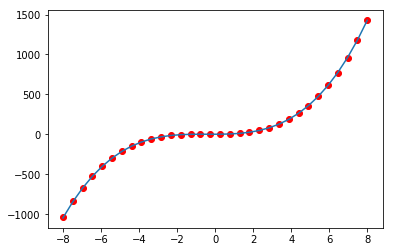

In [17]:
model.eval()

x = torch.FloatTensor(np.sort(np.linspace(-8, 8, 32)))
x_ = make_features(x)
y = f(x_)

pred = model(x_.cuda())

plt.plot(x.numpy(), y.numpy(), 'ro')
plt.plot(x.numpy(), pred.data.cpu().numpy())

In [18]:
model.state_dict()

OrderedDict([('ploy.weight',
              tensor([[0.4934, 2.9658, 2.4097]], device='cuda:0')),
             ('ploy.bias', tensor([0.9418], device='cuda:0'))])

In [19]:
# torch  默认floattensor
# 多项式回归的时候同一个x, 最高次如果是n，则需要把一个样本变成n列。
# x.squeeze(0)    # squeeze中的参数0、1分别代表第一、第二维度，squeeze(0)表示如果第一维度值为1，则去掉，否则不变。
# 故b的维度(1,3),可去掉1成(3),但不可去掉3。